In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("C:\\Users\\Sahil\\Downloads\\udemy_output_All_Finance__Accounting_p1_p626 (1).csv")

In [5]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [7]:
df.isnull().sum()
# Fill or drop missing values
df = df.dropna()


In [9]:
df = pd.get_dummies(df, columns=['is_paid',
'discount_price__currency', 'price_detail__currency'],
drop_first=True)

In [11]:
X = df[['avg_rating', 'num_reviews', 'num_published_lectures',
'discount_price__amount', 'price_detail__amount']]
y = df['num_subscribers']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)


In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 42577791.24083283
R-squared: 0.676660216571914


In [21]:
#Top 10 Most Popular Courses by Subscribers

df[['title', 'num_subscribers']].sort_values(by='num_subscribers', ascending=False).head(10)

,title,num_subscribers
4,An Entire MBA in 1 Course:Award Winning Busine...,374836
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509
3,The Complete Financial Analyst Course 2020,245860
19,Deep Learning Prerequisites: The Numpy Stack i...,239309
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070
15,The Complete Financial Analyst Training & Inve...,182002
35,The Complete Presentation and Public Speaking/...,158654
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282
22,"Introduction to Finance, Accounting, Modeling ...",140676
7,Beginner to Pro in Excel: Financial Modeling a...,127680


In [23]:
 #Top 10 Highest Rated Courses

df[['title', 'avg_rating']].sort_values(by='avg_rating', ascending=False).head(10)

,title,avg_rating
8926,How To Start Your Own Food Brand And Sell In S...,5.0
11073,How to Budget: From Basics to Levels of Financ...,5.0
11052,Financial Triage - Your first step to financia...,5.0
11053,QuickBooks (Beginners & Advanced): Fast Track ...,5.0
11062,A Complete Guide To Trading The Financial Markets,5.0
11066,College Visits on a Budget,5.0
13127,Forex Training dhameystiran,5.0
11068,Unfailing Principles Of Wealth,5.0
11070,Live FX Trading on Real Account With Gravity,5.0
6821,Energizing Your Powerful Entrepreneurial Mindset,5.0


In [53]:
#Average Ratings Over Time

df['published_time'] = pd.to_datetime(df['published_time'])
df['year'] = df['published_time'].dt.year
df.groupby('year')['avg_rating'].mean()




year
2010    4.216420
2011    4.202883
2012    4.071845
2013    4.060261
2014    4.075527
2015    4.090433
2016    4.073998
2017    4.033317
2018    3.990543
2019    3.932532
2020    3.569775
Name: avg_rating, dtype: float64

In [55]:
#Most Common Price Points

df['price_detail__amount'].value_counts().head(10)

price_detail__amount
8640.0    3212
1280.0    2856
3200.0     943
6400.0     925
1600.0     728
1920.0     623
2560.0     413
2240.0     364
6080.0     270
4800.0     234
Name: count, dtype: int64

In [57]:
#Top 10 Most Reviewed Courses


df[['title', 'num_reviews']].sort_values(by='num_reviews', ascending=False).head(10)



,title,num_reviews
0,The Complete SQL Bootcamp 2020: Go from Zero t...,78006
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,54581
2,PMP Exam Prep Seminar - PMBOK Guide 6,52653
3,The Complete Financial Analyst Course 2020,46447
4,An Entire MBA in 1 Course:Award Winning Busine...,41630
5,Microsoft Power BI - A Complete Introduction [...,38093
6,Agile Crash Course: Agile Project Management; ...,30470
7,Beginner to Pro in Excel: Financial Modeling a...,28665
8,Become a Product Manager | Learn the Skills & ...,27408
9,The Business Intelligence Analyst Course 2020,23906


C:\Users\Sahil\AppData\Local\Temp\ipykernel_15904\1601113898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_subscribers', y='title', data=top_courses, palette="crest")


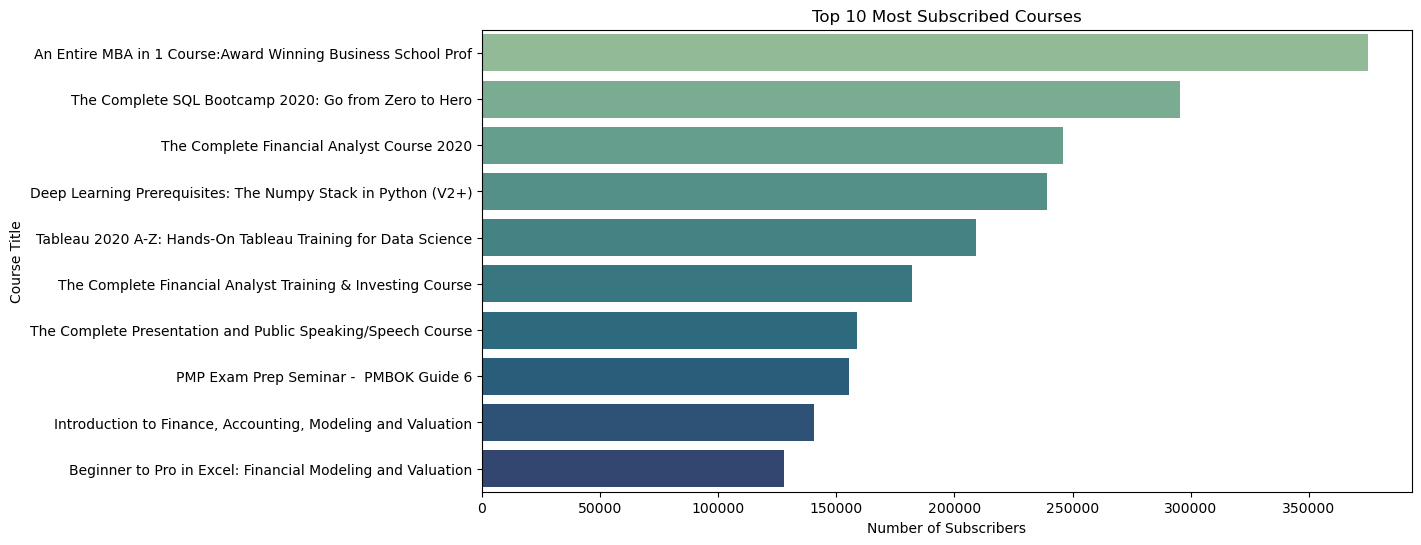

In [37]:
top_courses = df[['title', 'num_subscribers']].sort_values(by='num_subscribers', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='num_subscribers', y='title', data=top_courses, palette="crest")
plt.title("Top 10 Most Subscribed Courses")
plt.xlabel("Number of Subscribers")
plt.ylabel("Course Title")
plt.show()


C:\Users\Sahil\AppData\Local\Temp\ipykernel_15904\608749002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_bin', data=df, palette='pastel')


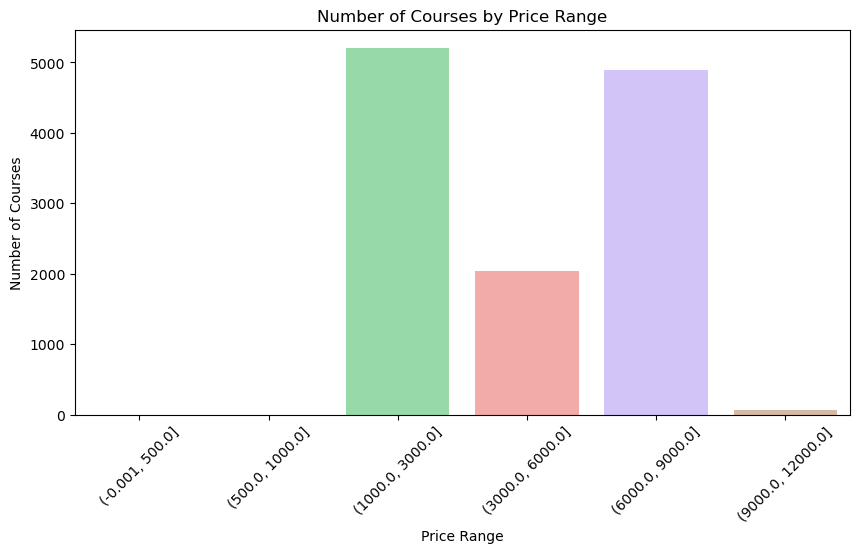

In [39]:
#Course Count by Price Ranges

plt.figure(figsize=(10, 5))
df['price_bin'] = pd.cut(df['price_detail__amount'], bins=[0, 500, 1000, 3000, 6000, 9000, 12000], include_lowest=True)
sns.countplot(x='price_bin', data=df, palette='pastel')
plt.title("Number of Courses by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.show()


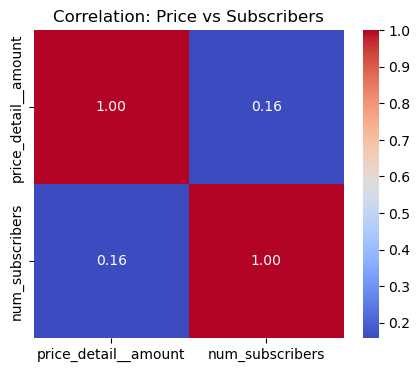

In [49]:
#Correlation Heatmap (Price vs Subscribers)

corr_data = df[['price_detail__amount', 'num_subscribers']].dropna()
corr = corr_data.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Price vs Subscribers")
plt.show()


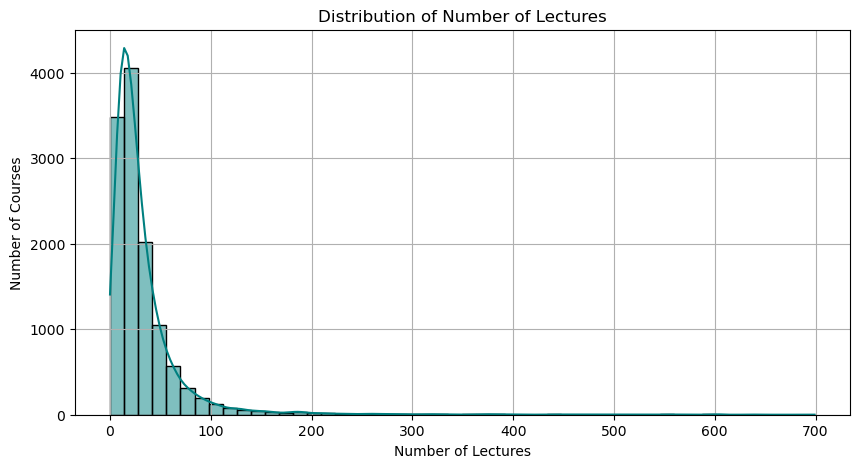

In [51]:
#Distribution of Number of Lectures per Course


plt.figure(figsize=(10, 5))
sns.histplot(df['num_published_lectures'], bins=50, kde=True, color='teal')
plt.title("Distribution of Number of Lectures")
plt.xlabel("Number of Lectures")
plt.ylabel("Number of Courses")
plt.grid(True)
plt.show()

